# Concrete Compressive Strength Prediction
---
## Problem Statement


Predict the **compressive strength of concrete** based on its ingredients and curing age using machine learning and cloud deployment.

---

## Dataset Description

Each record in the dataset includes the following variables:

| Feature                           | Type         | Unit         | Description         |
| --------------------------------- | ------------ | ------------ | ------------------- |
| Cement (component 1)              | Quantitative | kg/m³        | Input Variable      |
| Blast Furnace Slag (component 2)  | Quantitative | kg/m³        | Input Variable      |
| Fly Ash (component 3)             | Quantitative | kg/m³        | Input Variable      |
| Water (component 4)               | Quantitative | kg/m³        | Input Variable      |
| Superplasticizer (component 5)    | Quantitative | kg/m³        | Input Variable      |
| Coarse Aggregate (component 6)    | Quantitative | kg/m³        | Input Variable      |
| Fine Aggregate (component 7)      | Quantitative | kg/m³        | Input Variable      |
| Age                               | Quantitative | Days (1-365) | Input Variable      |
| **Concrete Compressive Strength** | Quantitative | MPa          | **Output Variable** |





In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


sns.set(style='whitegrid')


### Data Loading

In [139]:
df = pd.read_csv("Concrete_Data.csv")
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Data Cleaning

In [140]:
df.shape

(1030, 9)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [142]:
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [143]:
df[df.duplicated()]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


###  rows are duplicate this data will bais to ward prediction of model 

In [144]:
df =df.drop_duplicates()


In [145]:
df.duplicated().sum()

np.int64(0)

In [146]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Data Visualization

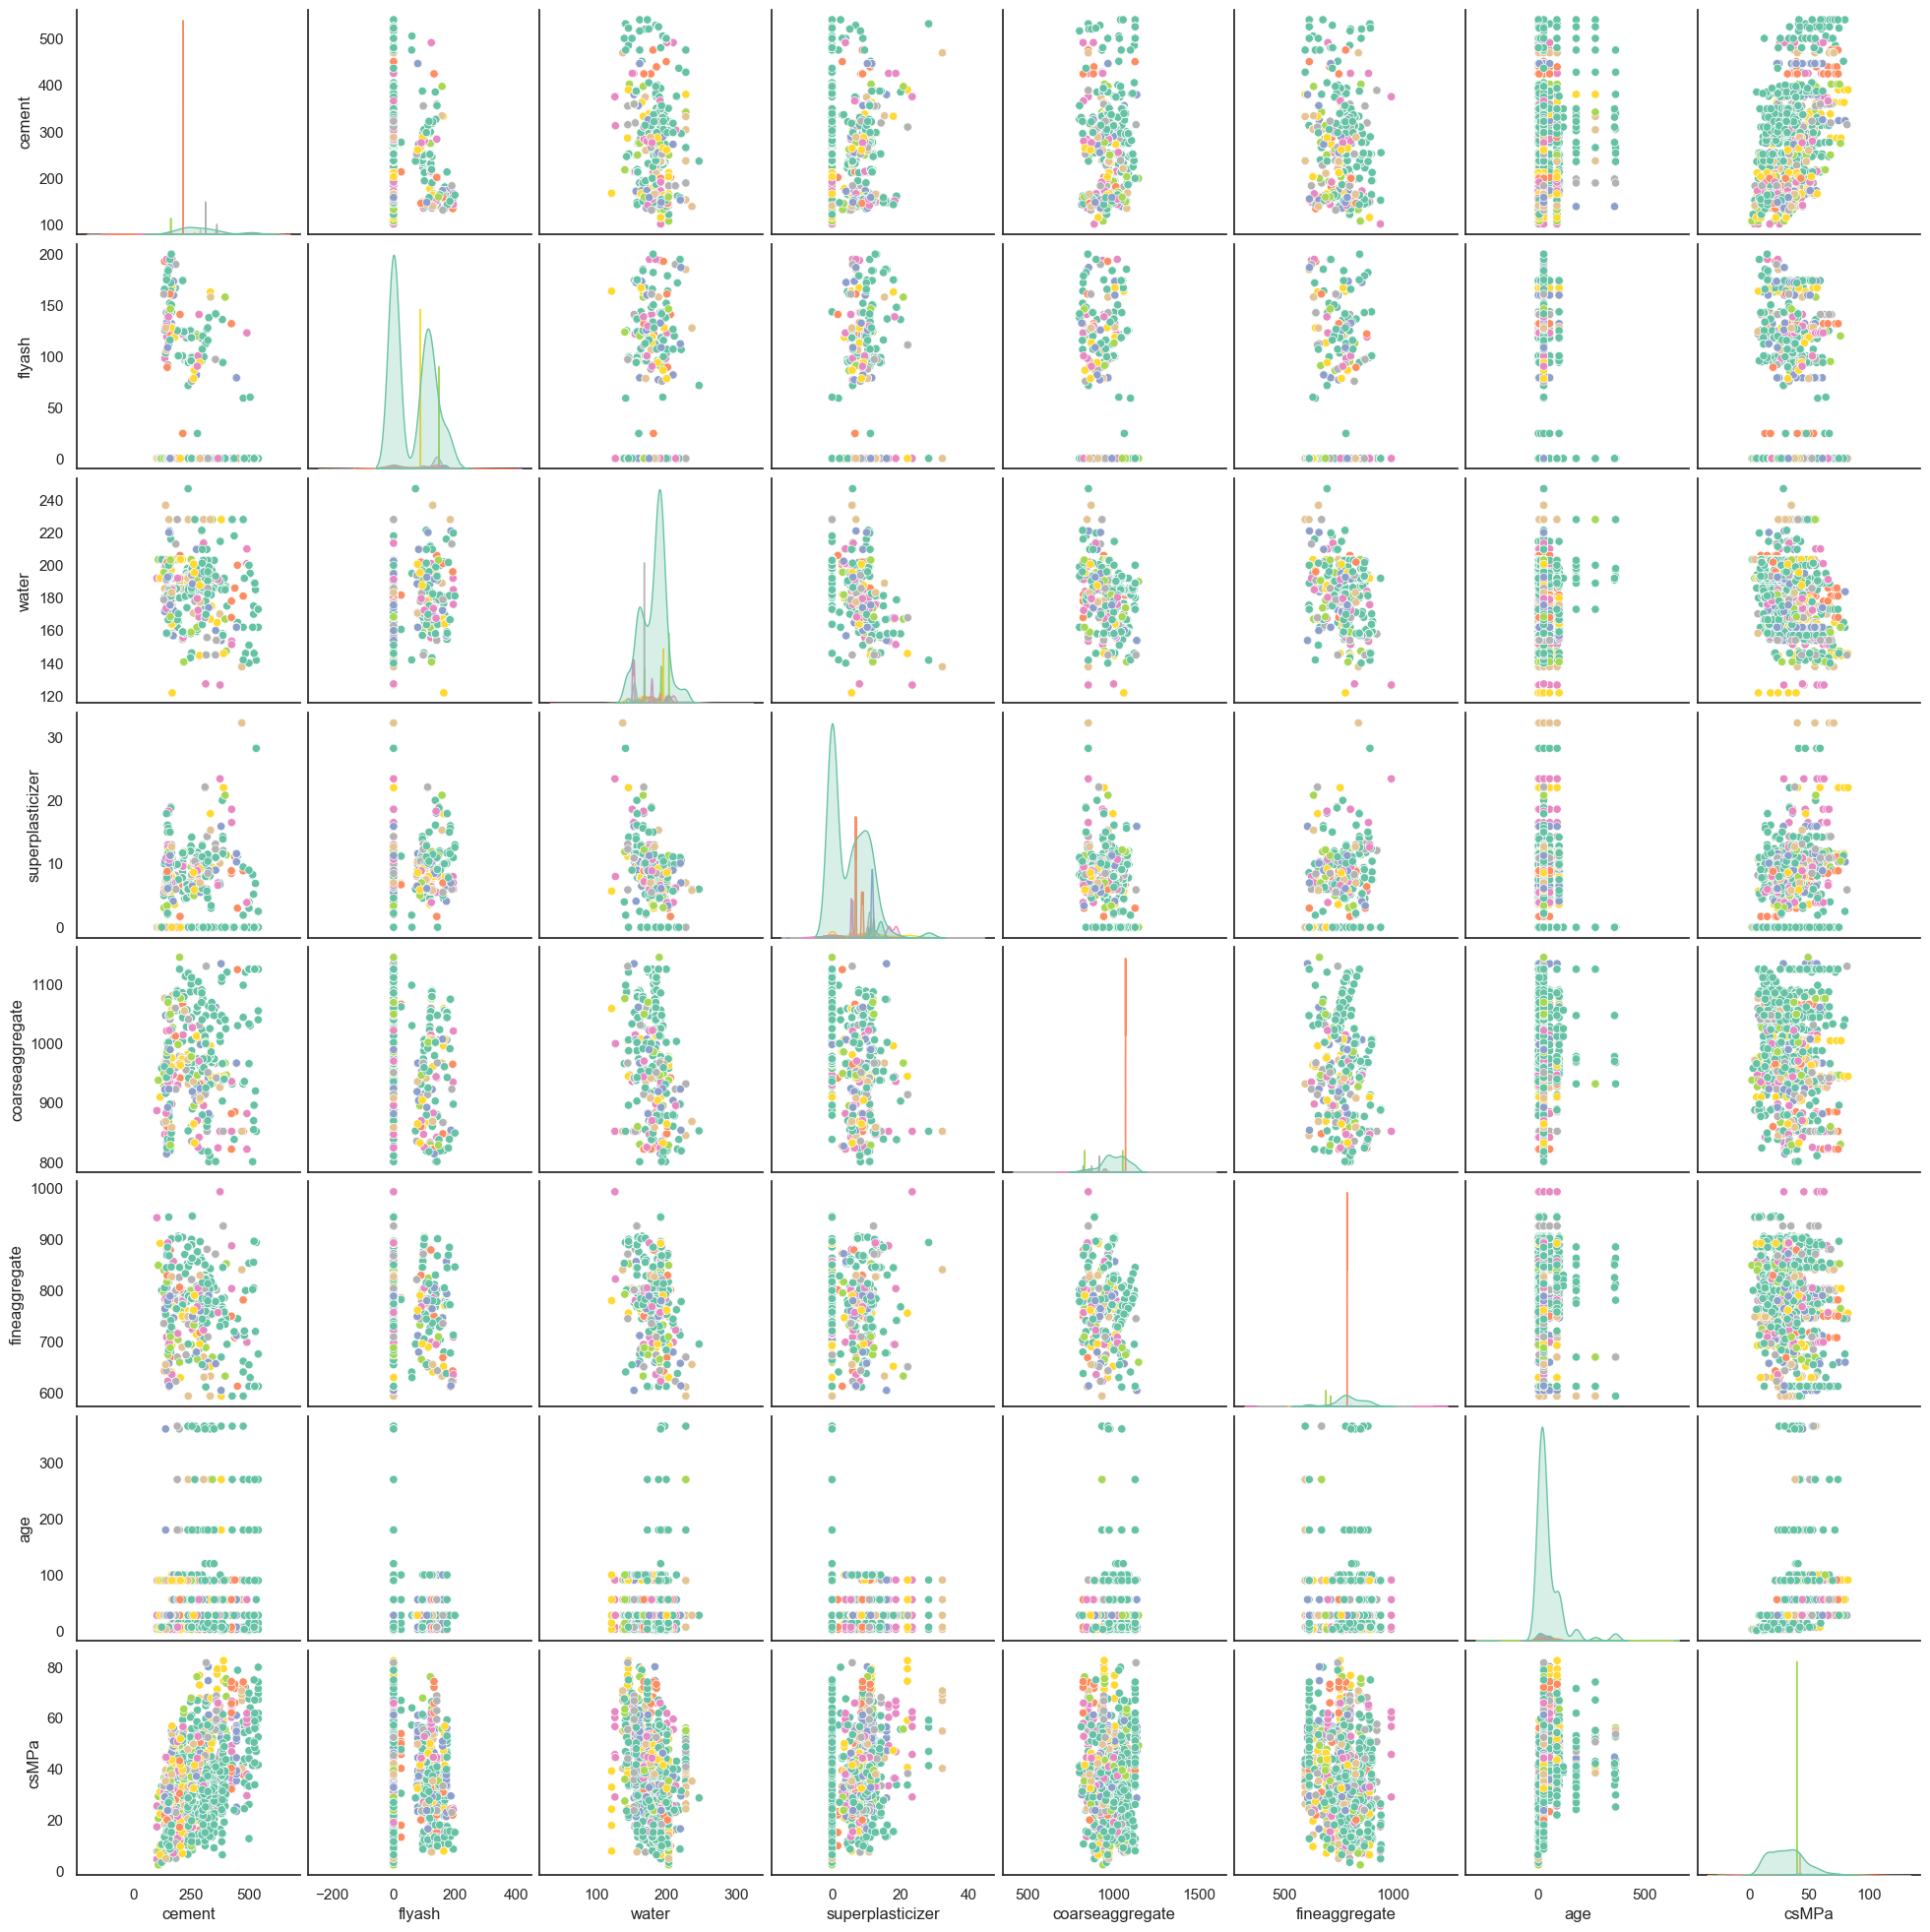

In [165]:
sns.pairplot(df, hue='slag',hue_order=None, palette="Set2")._legend.remove()

Text(0.5, 0.91, 'distribution of all columns')

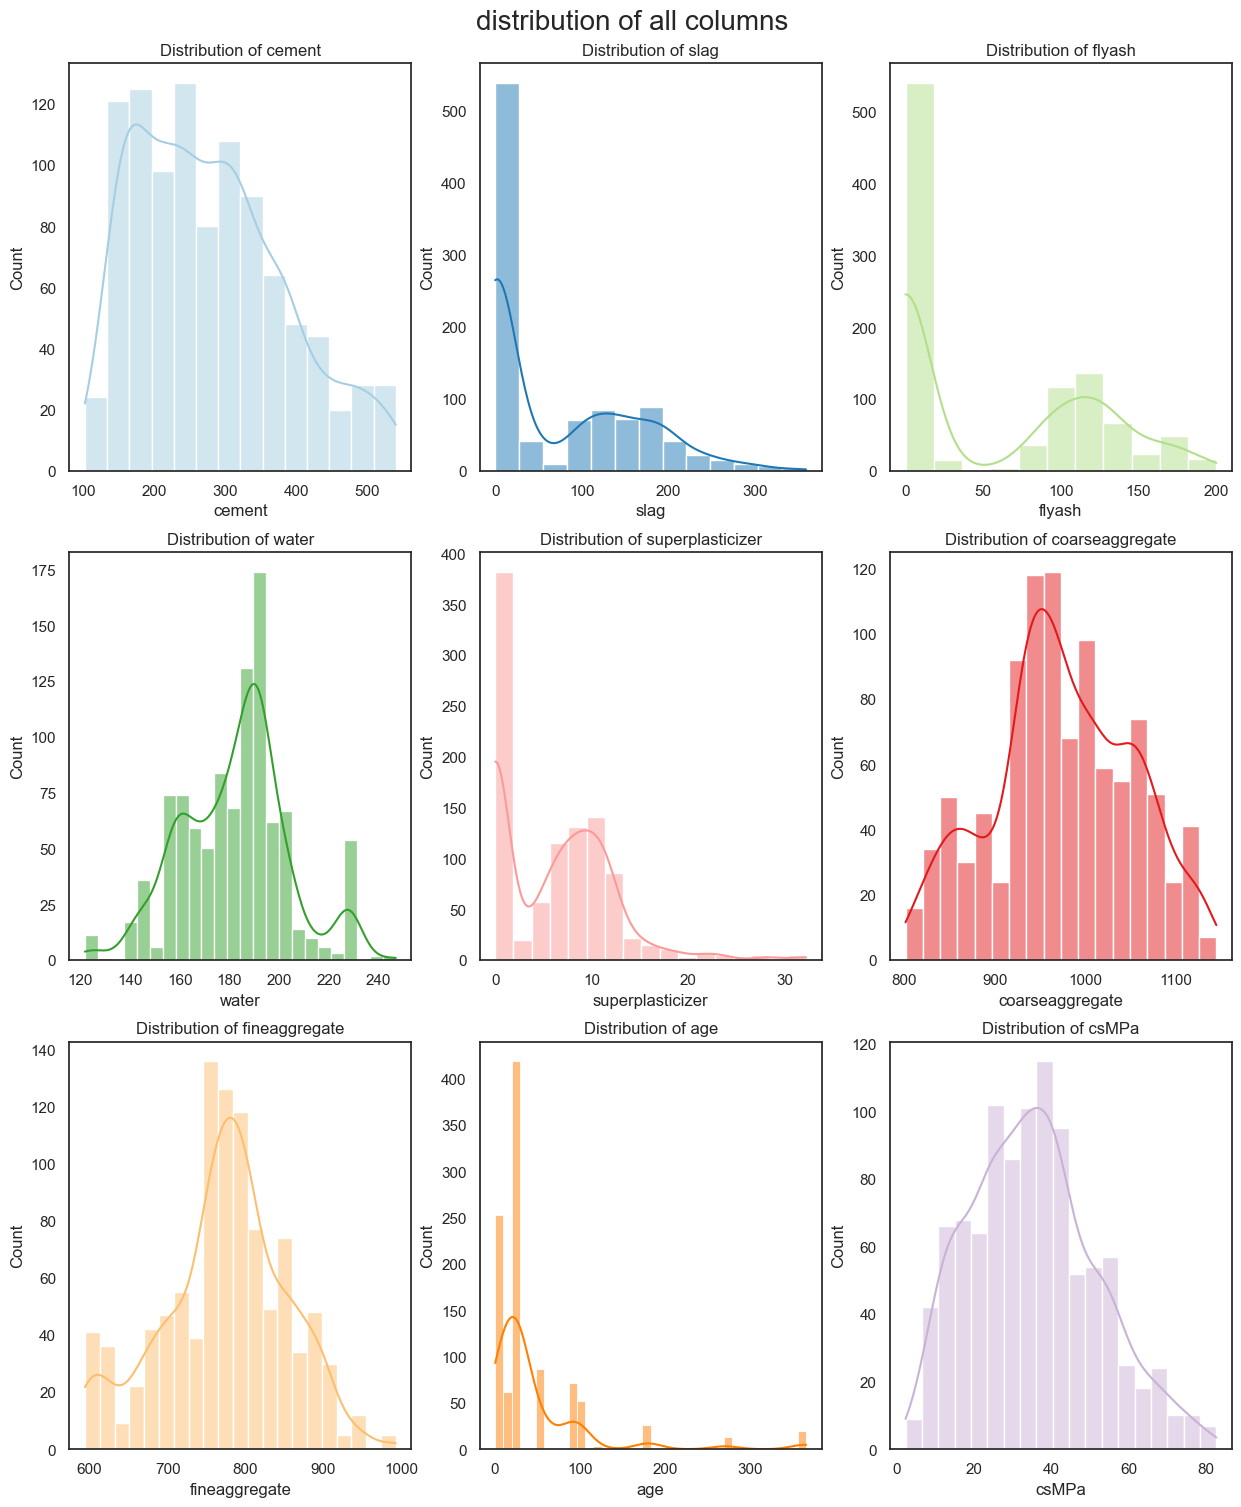

In [209]:
### data distribution 
colors= sns.color_palette('Paired',len(df.columns))

n_cols=3
n_rows= int(np.ceil(len(df.columns)/n_cols))
fig,axes= plt.subplots(n_rows,n_cols,figsize=(15,n_rows*6))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if df[col].dtype in ['int64', 'float64']:  
        sns.histplot(df[col], kde=True, ax=axes[i], color=colors[i])
        axes[i].set_title(f'Distribution of {col}')
    else:
        axes[i].set_visible(False)
    
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
plt.suptitle("distribution of all columns",fontsize=20,y=0.91)


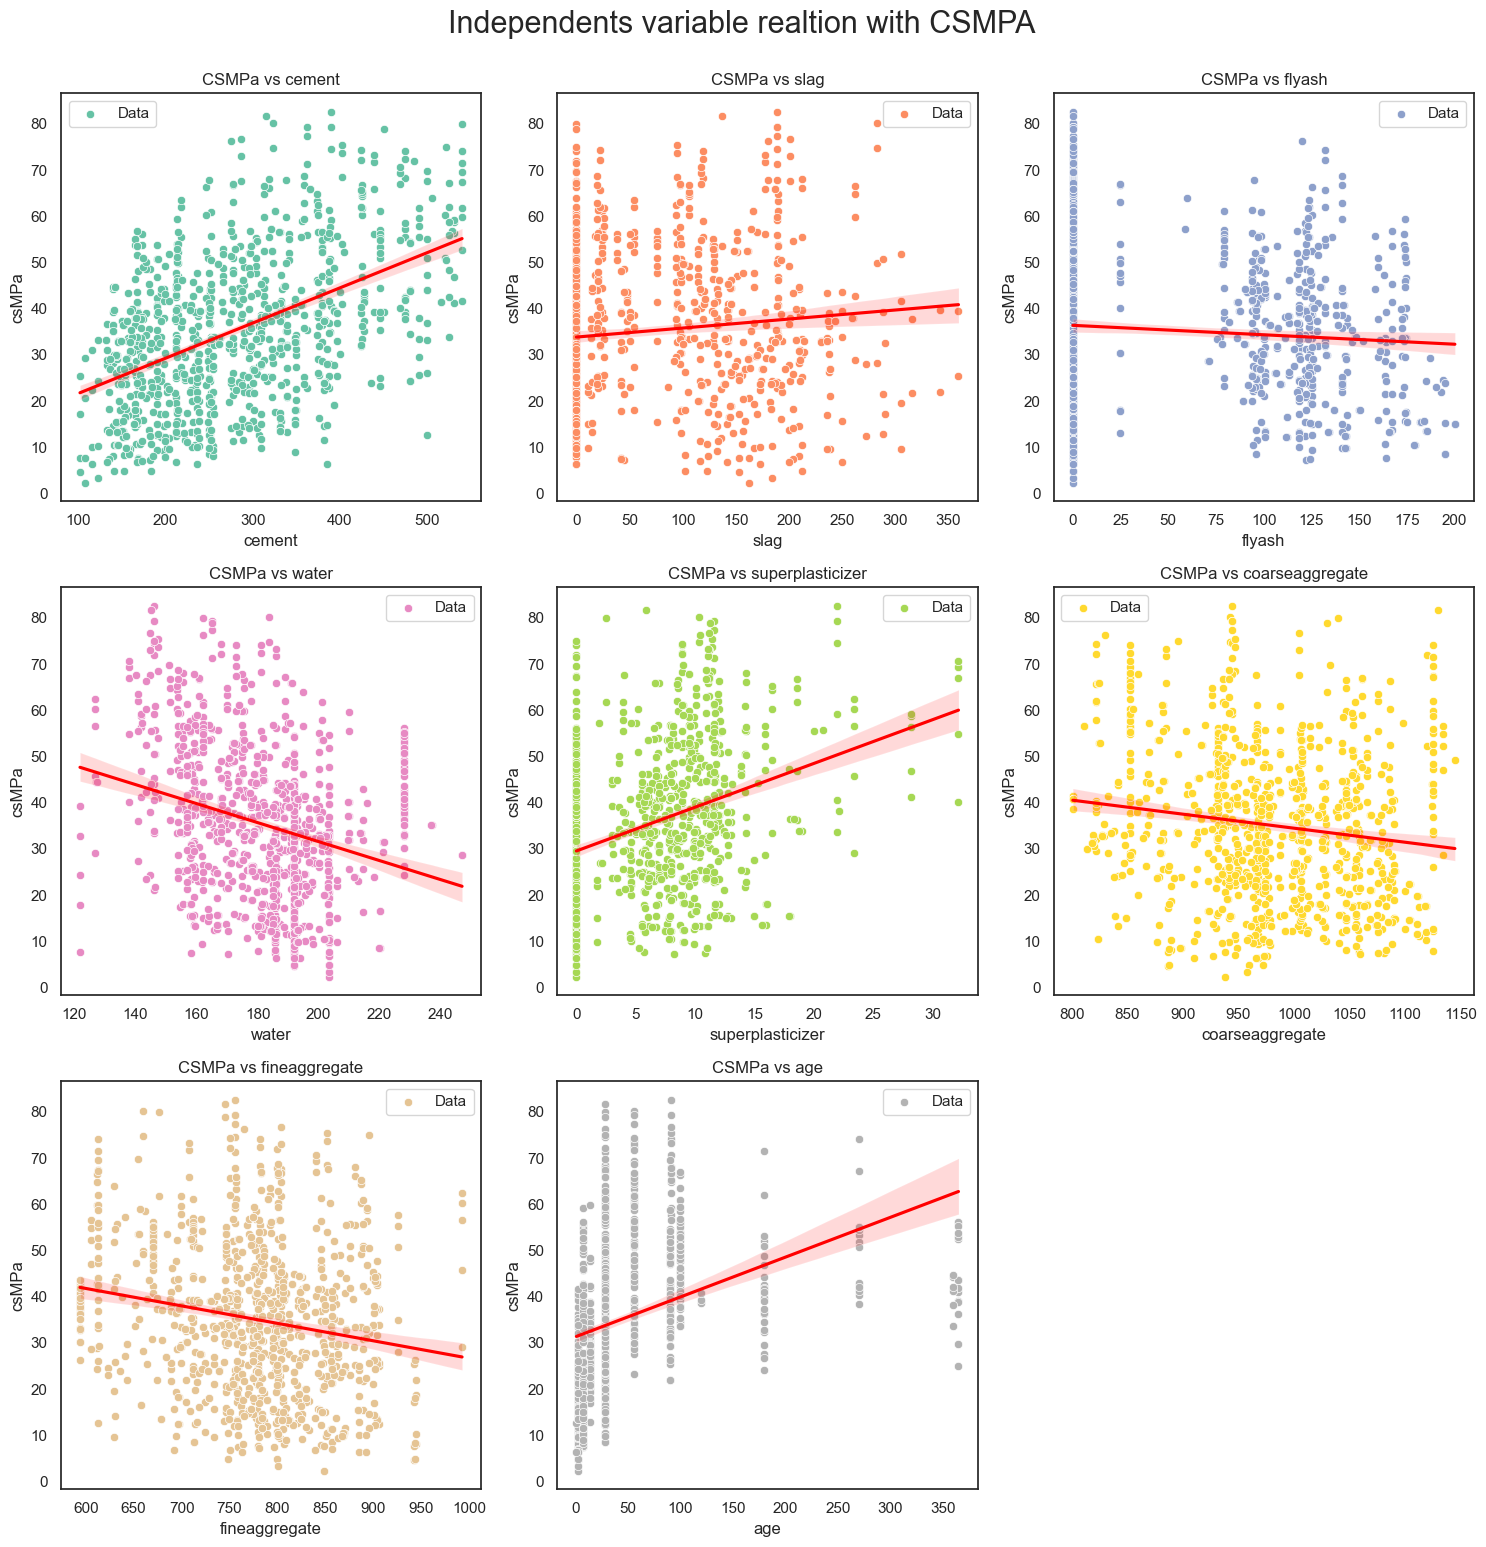

In [201]:
colors= sns.color_palette('Set2',len(df.columns))

fig,axes = plt.subplots(3,3,figsize=(15,15))
axes = axes.flatten()
for i,col in enumerate(df.columns[:-1]):
    axes[i].set_title(f"CSMPa vs {col}" )
    sns.scatterplot(x=col, y='csMPa', data=df, color=colors[i], label='Data',ax=axes[i])
    sns.regplot(x=col,y='csMPa',data=df,color='red',scatter=False,ax=axes[i])

for j in range(len(df.columns) - 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle("Independents variable realtion with CSMPA", fontsize=22, y=1.03)
plt.show()


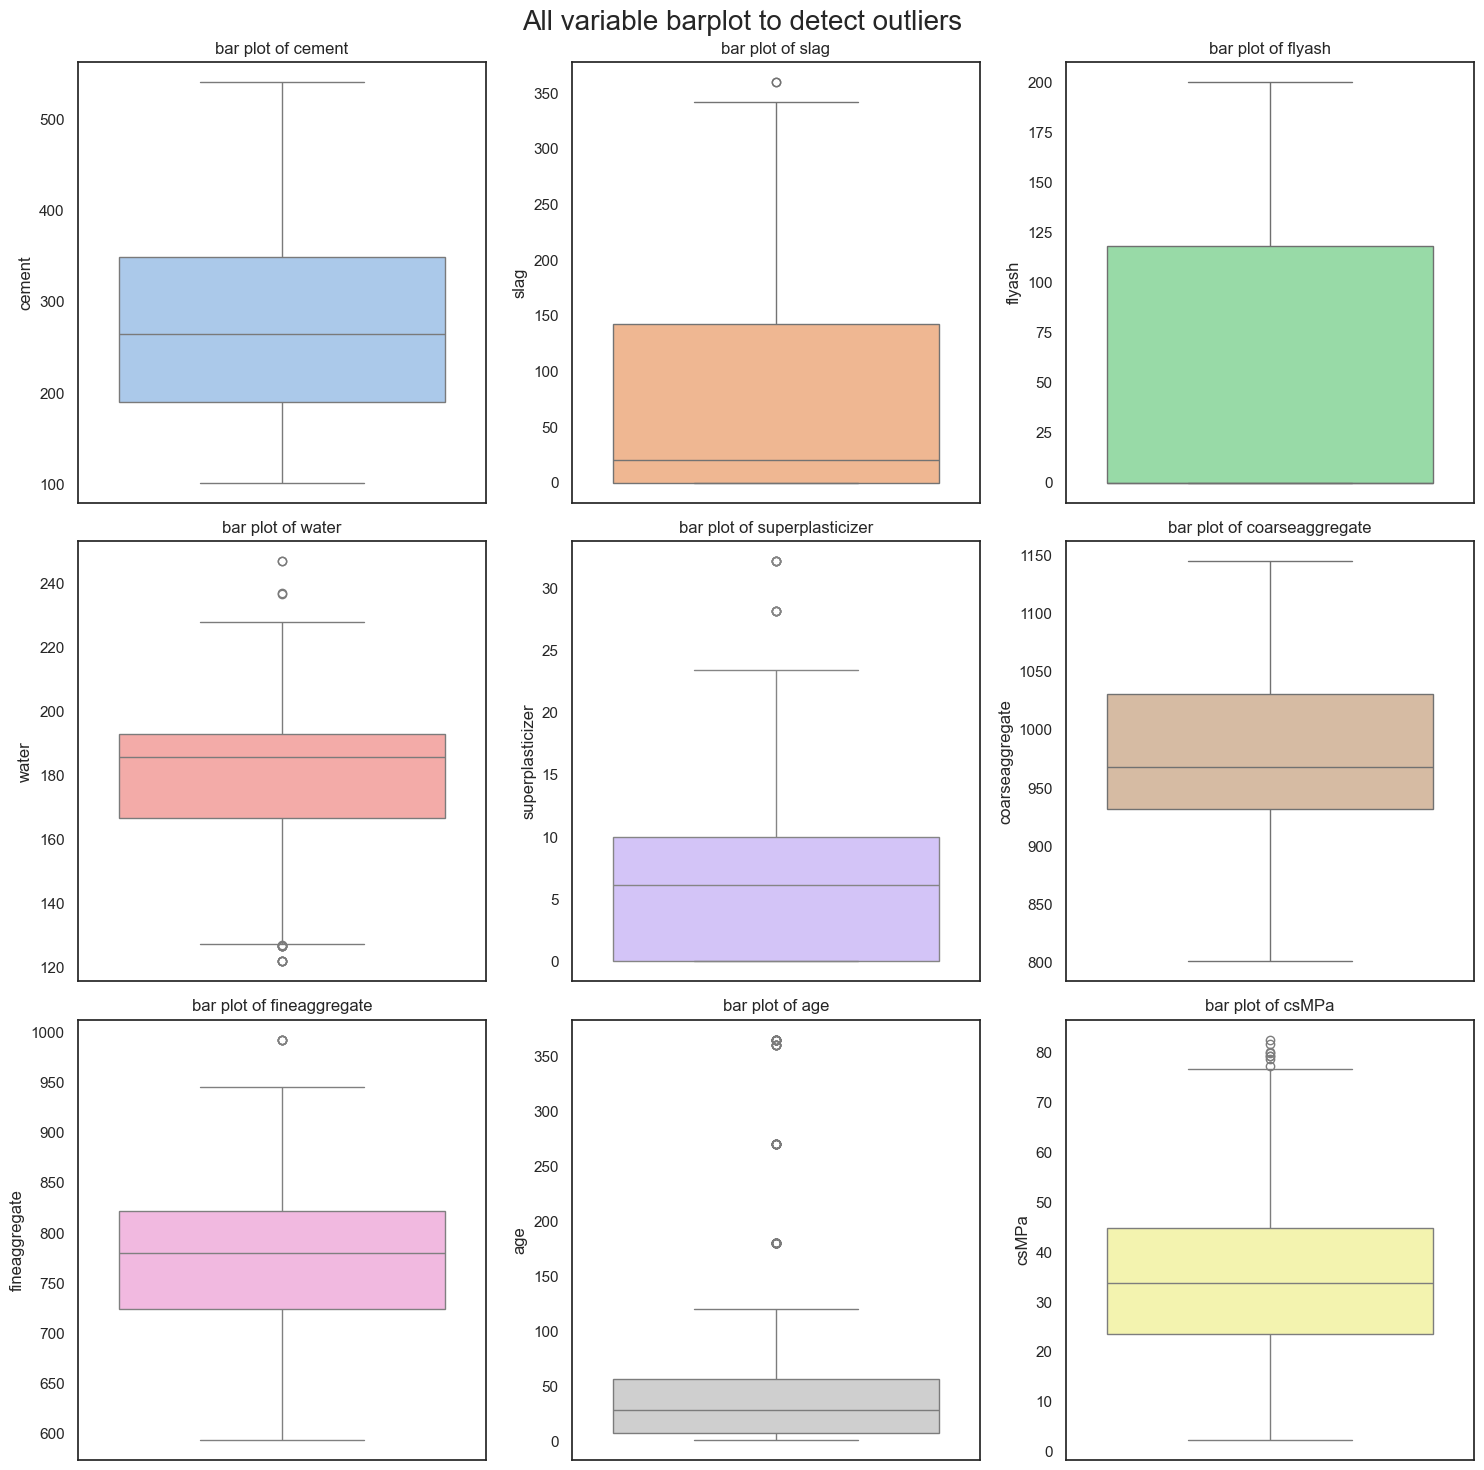

In [236]:
colors = sns.color_palette(palette="pastel",n_colors=len(df.columns))
fig,axes = plt.subplots(3,3,figsize=(15,15))
axes=axes.flatten()
for i,col in enumerate(df.columns):
    sns.boxplot(y=df[col],data=df,color=colors[i],ax=axes[i])
    axes[i].set_title(f"bar plot of {col}")
plt.suptitle("All variable barplot to detect outliers",fontsize=20)
plt.tight_layout()
plt.show()


#### Age have outliers it's value is upto 370 so i am using median and MAD (Median Absolute Deviation) to remove outliers

In [263]:
median_val = np.median(df['age'])
mad = np.median(np.abs(df['age'] - median_val))

#  Calculate modified Z-score
modified_z = 0.6745 * (df['age'] - median_val) / mad

#Keep only values where abs(modified_z) < 3.5
df1 = df[np.abs(modified_z) < 3.5].copy()

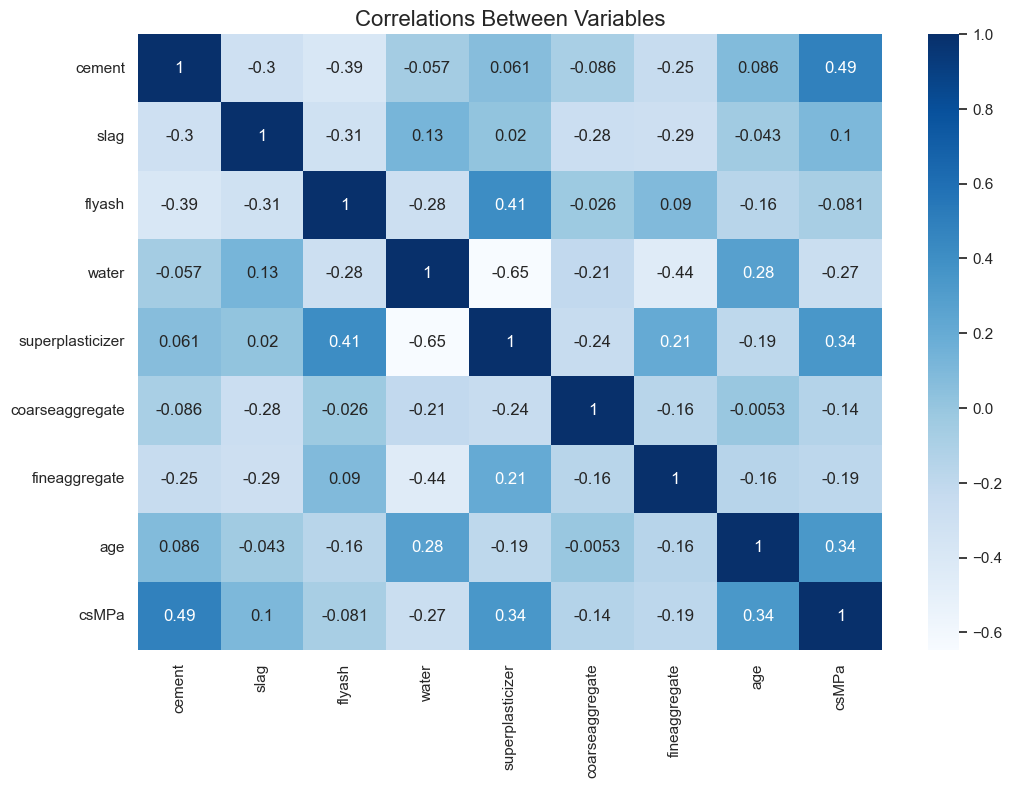

In [270]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()